In [21]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from ML.machine_learning_models import *
from ML.ml_utils_reg import potency_classes, ECFP4, create_directory
%autoreload 2

# Load dataset

In [23]:
# Dataset path
db_path = "./dataset/Datasets Chembl/"

# Load actives dB
regression_db_all = pd.read_csv(db_path + f'chembl_30_IC50_500_CPDs.csv')
regression_db_all['potency_class'] = potency_classes(regression_db_all.pPot.values, [5, 7, 9, 11])
regression_db_all

,nonstereo_aromatic_smiles,standard_type,pPot,chembl_cid,chembl_tid,Potency class,potency_class
0,COc1cccc2c1CCN(S(=O)(=O)c1cccc(C(=O)Nc3ccc(Cl)...,IC50,5.300000,CHEMBL520827,CHEMBL235,5 - 6,5
1,Cc1nsc(C)c1CCC1CCN(S(=O)(=O)CC(C)(CC(C)c2ncc(F...,IC50,5.619789,CHEMBL1683460,CHEMBL333,5 - 6,5
2,Cc1nonc1NS(=O)(=O)c1ccc(Oc2ccc(Cl)cc2-c2ccnn2C...,IC50,5.000000,CHEMBL2325553,CHEMBL4296,5 - 6,5
3,CCN(CCCCCCCCc1cccc(OC)c1)Cc1ccccc1OC,IC50,5.247952,CHEMBL3752227,CHEMBL220,5 - 6,5
4,CCN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1OC,IC50,5.501689,CHEMBL224553,CHEMBL220,5 - 6,5
...,...,...,...,...,...,...,...
40435,CC1NC(=O)c2cc(-c3c(F)ccc4c(=O)n(C)c(NC(C)(C)C)...,IC50,10.000000,CHEMBL3902148,CHEMBL2147,10 - 11,9
40436,CCOc1ccccc1-c1cc2c(NC(CCO)c3ccccc3)ncnc2[nH]1,IC50,10.000000,CHEMBL4760328,CHEMBL203,10 - 11,9
40437,COCc1ccc(COCc2csc3nc(C(=O)NCc4cccc(OC)c4)[nH]c...,IC50,10.096910,CHEMBL3337890,CHEMBL280,10 - 11,9
40438,CN1CCN(c2cccc(CCNC(=O)c3cnc(C#N)nc3NCC(C)(C)C)...,IC50,10.958607,CHEMBL414530,CHEMBL268,10 - 11,9


# Select TIDS

In [24]:
n = 75
regression_db_n = pd.DataFrame()
for tid in regression_db_all.chembl_tid.unique()[:]:
    df_reg_tid = regression_db_all.loc[regression_db_all.chembl_tid == tid]
    if df_reg_tid['potency_class'].unique().tolist() == [5, 7, 9]:
        if len(df_reg_tid.loc[df_reg_tid['potency_class'] == 5]) > n and len(df_reg_tid.loc[df_reg_tid['potency_class'] == 7]) > n and len(df_reg_tid.loc[df_reg_tid['potency_class'] == 9]) > n:
            regression_db_n = pd.concat([regression_db_n,df_reg_tid])
regression_db_n

,nonstereo_aromatic_smiles,standard_type,pPot,chembl_cid,chembl_tid,Potency class,potency_class
1,Cc1nsc(C)c1CCC1CCN(S(=O)(=O)CC(C)(CC(C)c2ncc(F...,IC50,5.619789,CHEMBL1683460,CHEMBL333,5 - 6,5
226,Cc1ncccc1CCC1CCN(S(=O)(=O)CC2(N(O)C=O)CCOCC2)CC1,IC50,5.420216,CHEMBL1784349,CHEMBL333,5 - 6,5
346,CCNC(=O)N1CCC(C(=O)NO)(S(=O)(=O)c2ccc(OCc3cc(C...,IC50,5.442012,CHEMBL497012,CHEMBL333,5 - 6,5
347,CCNC(=O)CCC(NS(=O)(=O)c1ccc([N+](=O)[O-])cc1)C...,IC50,5.272459,CHEMBL4164016,CHEMBL333,5 - 6,5
481,Cn1ccnc1C1(CNC(=O)c2cc3cc(Cl)ccc3o2)NC(=O)NC1=O,IC50,5.309894,CHEMBL3358156,CHEMBL333,5 - 6,5
...,...,...,...,...,...,...,...
40075,CC(C)CC(NC(=O)C1CNCC(N2CC(=O)N(c3ccccc3Cl)CC2(...,IC50,9.000000,CHEMBL2419040,CHEMBL286,9 - 10,9
40136,CC(C)C(CC(O)C(N)CN1CC(=O)N(c2ccccc2Cl)CC1(C)C)...,IC50,9.000000,CHEMBL2387446,CHEMBL286,9 - 10,9
40139,CC(C)C(CC(O)C(N)CN1CC(=O)N(c2ccccc2Cl)CC1(C)C)...,IC50,9.000000,CHEMBL2048704,CHEMBL286,9 - 10,9
40177,CC(C)C(CC(O)C(N)CN1CC(=O)N(c2ccccc2Cl)CC1(C)C)...,IC50,9.045757,CHEMBL2387557,CHEMBL286,9 - 10,9


In [25]:
regression_tids = ['CHEMBL333', 'CHEMBL268', 'CHEMBL280', 'CHEMBL203', 'CHEMBL279', 'CHEMBL2409', 'CHEMBL260', 'CHEMBL286']
regression_db = regression_db_all.loc[regression_db_all.chembl_tid.isin(regression_tids)]
regression_db["Target ID"] = regression_db["chembl_tid"].map(lambda x: x.lstrip("CHEMBL").rstrip("")).astype(int)
regression_db

,nonstereo_aromatic_smiles,standard_type,pPot,chembl_cid,chembl_tid,Potency class,potency_class,Target ID
1,Cc1nsc(C)c1CCC1CCN(S(=O)(=O)CC(C)(CC(C)c2ncc(F...,IC50,5.619789,CHEMBL1683460,CHEMBL333,5 - 6,5,333
17,Cc1noc(CN2CCC(CCOc3ccc(-c4cc5c(ncn5C)c(C#N)n4)...,IC50,5.940058,CHEMBL1669280,CHEMBL268,5 - 6,5,268
20,Cc1nsc(C)c1CCC1CCN(S(=O)(=O)CC(C)(CC(C)c2ncc(F...,IC50,5.337242,CHEMBL1683460,CHEMBL280,5 - 6,5,280
75,Cc1noc(C)c1CCC1CCN(S(=O)(=O)CC2(N(O)C=O)CCN(S(...,IC50,5.337242,CHEMBL1784342,CHEMBL280,5 - 6,5,280
96,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,IC50,5.869666,CHEMBL50470,CHEMBL203,5 - 6,5,203
...,...,...,...,...,...,...,...,...
40433,COc1cccc(CNC(=O)c2nc3scc(NC(=O)Cc4ccc(C(=O)O)c...,IC50,10.677781,CHEMBL3337903,CHEMBL280,10 - 11,9,280
40434,CCCc1ccc(CCC2C(=O)NC(C(=O)NC)Cc3ccc(cc3)OCCCCC...,IC50,10.000000,CHEMBL418291,CHEMBL333,10 - 11,9,333
40436,CCOc1ccccc1-c1cc2c(NC(CCO)c3ccccc3)ncnc2[nH]1,IC50,10.000000,CHEMBL4760328,CHEMBL203,10 - 11,9,203
40437,COCc1ccc(COCc2csc3nc(C(=O)NCc4cccc(OC)c4)[nH]c...,IC50,10.096910,CHEMBL3337890,CHEMBL280,10 - 11,9,280


# Target stats

In [26]:
regression_db_g = regression_db.groupby('Target ID').pPot.agg(['mean', 'median'])
regression_db_g

,mean,median
Target ID,,
203,7.239903,7.187087
260,7.251528,7.301030
268,7.361872,7.351667
279,6.967731,7.017729
280,7.732782,7.721246
286,7.644550,7.795880
333,7.226078,7.183771
2409,7.573244,7.721246


# Compound percentage per potency range

In [31]:
pc_stats = []
for tidd in regression_db['Target ID'].unique()[:]:
    reg_db = regression_db.loc[regression_db["Target ID"] == tidd]
    for potc in reg_db.potency_class.unique()[:]:
        reg_db_pc = reg_db.query('potency_class == @potc')
        pc_stats.append({'Target ID': tidd,
                         'Potency_class': potc,
                         'count': round((reg_db_pc.shape[0]/reg_db.shape[0])*100, 2)})
df_pc_stats = pd.DataFrame(pc_stats)
df_pc_stats.to_csv('./dataset/dataset_stats.csv')

,Target ID,Potency_class,count
0,333,5,45.59
1,333,7,42.81
2,333,9,11.60
3,268,5,37.79
4,268,7,51.16
5,268,9,11.05
6,280,5,31.51
7,280,7,47.01
8,280,9,21.48
9,203,5,44.56


# Plot

In [27]:
#COLOR PALETTE
pal = sns.color_palette("Set1")
pal_mod = [pal[0], pal[4], pal[7], pal[6], pal[1], pal[3], pal[5], pal[2]]
pal_mod_tid = [pal[0], pal[1], pal[2]]
figure_path = create_directory('./figures')

# S1b

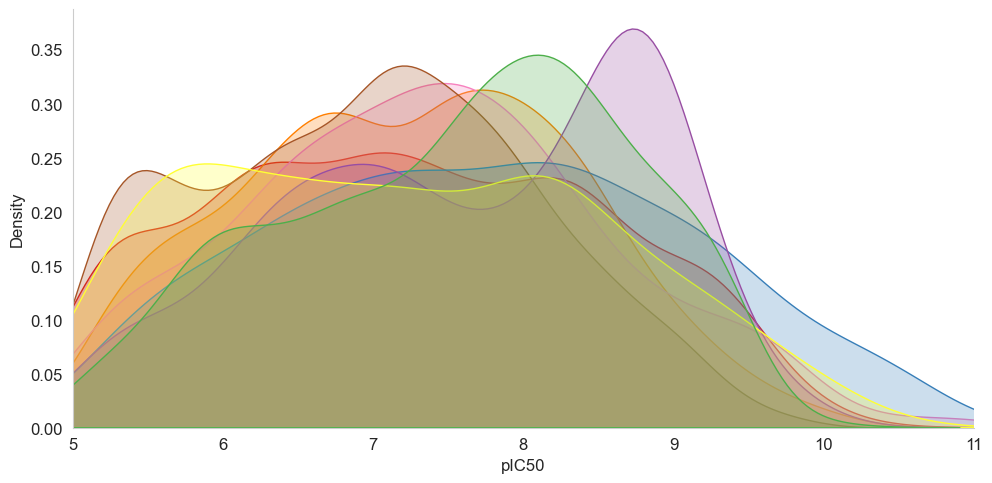

<Figure size 640x480 with 0 Axes>

In [24]:
sns.set_style("whitegrid", {'axes.grid' : False})
regression_db['Target ID'].value_counts()
font={'size': 12}
matplotlib.rc('font', **font)
fig = sns.FacetGrid(regression_db, hue='Target ID',height=5, aspect=2, palette=pal_mod,).map(sns.kdeplot, "pPot", fill=True,)#.add_legend()
fig.set_xlabels('pIC50')
fig.set(xlim=(5, 11))
fig.set_titles("{col_var}: {col_name}")
plt.savefig(os.path.join(figure_path, f'S1b.png'), dpi=300)
plt.show()
plt.clf()

# S1a

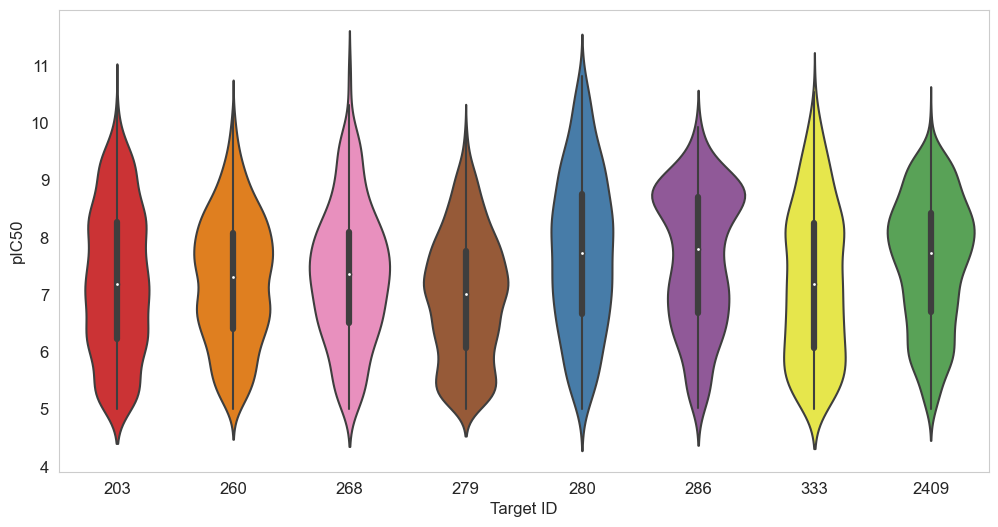

<Figure size 640x480 with 0 Axes>

In [25]:
sns.set_style("whitegrid", {'axes.grid' : False})
ax = plt.figure(figsize=(12, 6))
regression_db['Target ID'].value_counts()
fig = sns.violinplot(regression_db, x='Target ID', y='pPot', palette=pal_mod)
fig.set(ylabel='pIC50')
plt.savefig(os.path.join(figure_path, f'S1a.png'), dpi=300)
plt.show()
plt.clf()

# Plot 3 tids

In [16]:
regression_db_tids = regression_db.loc[regression_db['Target ID'].isin([203,280,2409])]
regression_db_tids

,nonstereo_aromatic_smiles,standard_type,pPot,chembl_cid,chembl_tid,Potency class,potency_class,Target ID
20,Cc1nsc(C)c1CCC1CCN(S(=O)(=O)CC(C)(CC(C)c2ncc(F...,IC50,5.337242,CHEMBL1683460,CHEMBL280,5 - 6,5,280
75,Cc1noc(C)c1CCC1CCN(S(=O)(=O)CC2(N(O)C=O)CCN(S(...,IC50,5.337242,CHEMBL1784342,CHEMBL280,5 - 6,5,280
96,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,IC50,5.869666,CHEMBL50470,CHEMBL203,5 - 6,5,203
138,CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(Br)...,IC50,5.000000,CHEMBL13629,CHEMBL203,5 - 6,5,203
166,Clc1cc(Nc2ncnc3cccc(OC4CCOCC4)c23)ccc1OCc1ccccn1,IC50,5.619789,CHEMBL193578,CHEMBL203,5 - 6,5,203
...,...,...,...,...,...,...,...,...
40431,COc1cccc(CNC(=O)c2nc3scc(NC(=O)Cc4ccccc4)c3c(=...,IC50,10.275724,CHEMBL3337902,CHEMBL280,10 - 11,9,280
40432,CC(C)C(CS(=O)(=O)c1ccc(-c2cccc(CNC(=O)c3nc4ccc...,IC50,10.292430,CHEMBL3889936,CHEMBL280,10 - 11,9,280
40433,COc1cccc(CNC(=O)c2nc3scc(NC(=O)Cc4ccc(C(=O)O)c...,IC50,10.677781,CHEMBL3337903,CHEMBL280,10 - 11,9,280
40436,CCOc1ccccc1-c1cc2c(NC(CCO)c3ccccc3)ncnc2[nH]1,IC50,10.000000,CHEMBL4760328,CHEMBL203,10 - 11,9,203


# F2a

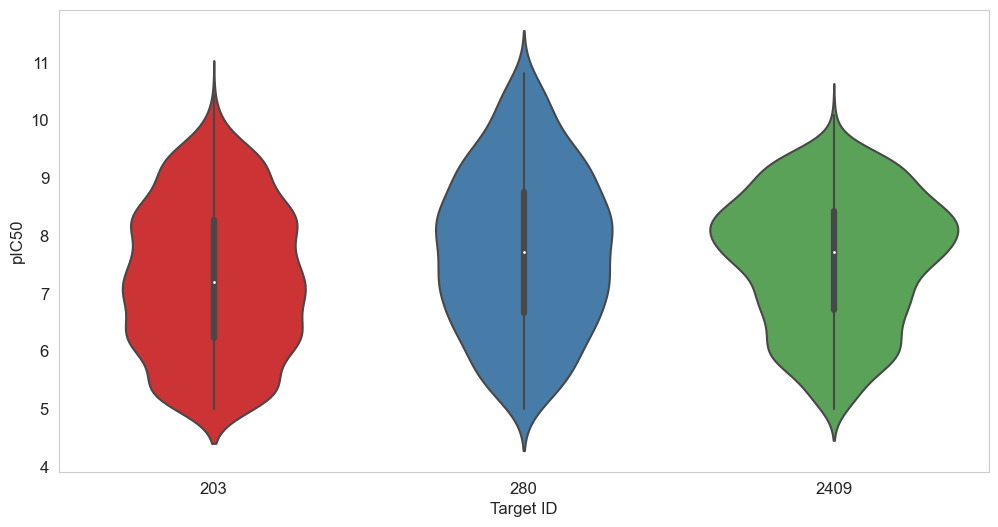

<Figure size 640x480 with 0 Axes>

In [26]:
sns.set_style("whitegrid", {'axes.grid' : False})
ax = plt.figure(figsize=(12, 6))
regression_db['Target ID'].value_counts()
fig = sns.violinplot(regression_db_tids, x='Target ID', y='pPot', palette=pal_mod_tid)
fig.set(ylabel='pIC50')
plt.savefig(os.path.join(figure_path, f'F2a.png'), dpi=300)
plt.show()
plt.clf()

# F2b

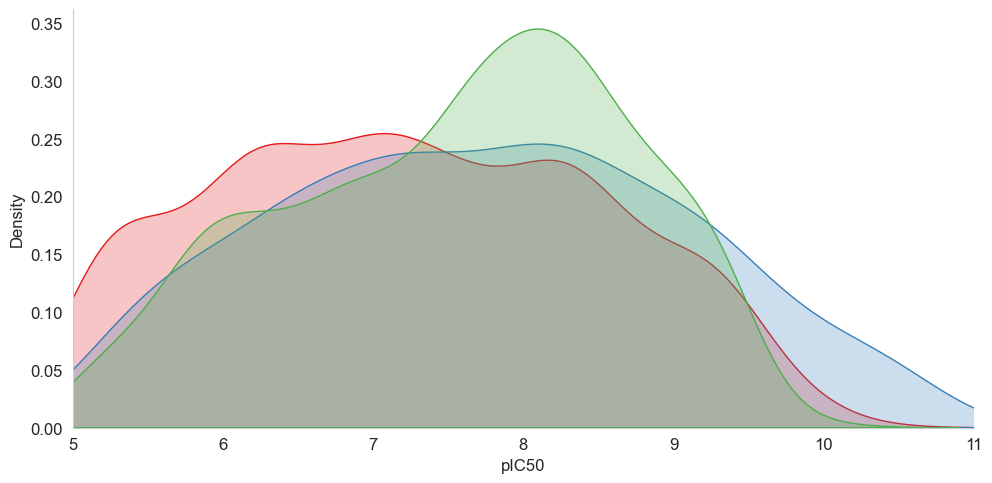

<Figure size 640x480 with 0 Axes>

In [27]:
sns.set_style("whitegrid", {'axes.grid' : False})
regression_db['Target ID'].value_counts()
font={'size': 12}
matplotlib.rc('font', **font)
fig = sns.FacetGrid(regression_db_tids, hue='Target ID',height=5, aspect=2, palette=pal_mod_tid,).map(sns.kdeplot, "pPot", fill=True,)
fig.set_xlabels('pIC50')
fig.set(xlim=(5, 11))
fig.set_titles("{col_var}: {col_name}")
plt.savefig(os.path.join(figure_path, f'F2b.png'), dpi=300)
plt.show()
plt.clf()

# Pairwise similarity

In [19]:
from collections import OrderedDict
from rdkit import DataStructs

regression_tids = ['CHEMBL333', 'CHEMBL268', 'CHEMBL280', 'CHEMBL203', 'CHEMBL279', 'CHEMBL2409', 'CHEMBL260', 'CHEMBL286']
regression_db = regression_db_all.loc[regression_db_all.chembl_tid.isin(regression_tids)]
regression_db.rename(columns={'chembl_tid': 'Target ID', 'nonstereo_aromatic_smiles':'smiles'}, inplace=True)
regression_db['Target ID'] = regression_db['Target ID'].map(lambda x: x.lstrip("CHEMBL").rstrip("")).astype(int)

db_pw_query = OrderedDict({'target': [203,2409,260, 268,279,280,286,333],
                           'pot_class': [5,7,9],
                           })

df_sim_dataset = pd.DataFrame()
db_pw_search_query = {n: {name: value for name, value in zip(db_pw_query.keys(), comb)} for n, comb in enumerate(it.product(*list(db_pw_query.values())), 1)}
for i, idx_params in enumerate(db_pw_search_query):

    cur_params = db_pw_search_query[idx_params]

    pot_pw_df = regression_db.copy()
    pot_pw_trial = pot_pw_df.loc[(pot_pw_df['Target ID'] == cur_params.get('target')) &
                                 (pot_pw_df['potency_class'] == cur_params.get('pot_class'))
                                 ]
    #display(pot_pw_trial)
    potency = pot_pw_trial.pPot.values
    cids = pot_pw_trial.chembl_cid.values
    #display(pot_pw_trial)
    fp_matrix = ECFP4(pot_pw_trial.smiles.values)

    smiles = pot_pw_trial.smiles.values
    smi_len = len(smiles)
    m = np.zeros([smi_len, smi_len])
    pot_diff = np.zeros([smi_len, smi_len])
    cids_r = np.zeros([smi_len, smi_len], dtype=object)
    cids_o = np.zeros([smi_len, smi_len], dtype=object)
    smi_r = np.zeros([smi_len, smi_len], dtype=object)
    smi_o = np.zeros([smi_len, smi_len], dtype=object)
    pot_r = np.zeros([smi_len, smi_len], dtype=object)
    pot_o = np.zeros([smi_len, smi_len], dtype=object)

    # Calculate upper triangle of matrix
    for i in range(smi_len):
        for j in range(i, smi_len):
            m[i, j] = DataStructs.TanimotoSimilarity(fp_matrix[i],
                                                     fp_matrix[j])
            pot_diff[i, j] = abs(potency[i] - potency[j])
            cids_r[i , j] = cids[i]
            cids_o[i, j] = cids[j]
            smi_r[i, j] = smiles[i]
            smi_o[i, j] = smiles[j]
            pot_r[i, j] = potency[i]
            pot_o[i, j] = potency[j]

    # # Fill the diagonal with 0's
    np.fill_diagonal(m, np.nan)
    np.fill_diagonal(pot_diff, np.nan)
    np.fill_diagonal(cids_r, np.nan)
    np.fill_diagonal(cids_o, np.nan)
    np.fill_diagonal(smi_r, np.nan)
    np.fill_diagonal(smi_o, np.nan)
    np.fill_diagonal(pot_r, np.nan)
    np.fill_diagonal(pot_o, np.nan)
    #
    sim_r = np.ravel(m)
    pot_dif = np.ravel(pot_diff)
    cids_ref = np.ravel(cids_r)
    cids_ot = np.ravel(cids_o)
    smi_ref = np.ravel(smi_r)
    smi_ot = np.ravel(smi_o)
    pot_ref = np.ravel(pot_r)
    pot_ot = np.ravel(pot_o)

    df_sim = pd.DataFrame(list(zip(sim_r, pot_dif, pot_ref, pot_ot,cids_ref, cids_ot, smi_ref, smi_ot)), columns=['Similarity', 'Δ pIC50', 'Pot_r','Pot_o','Reference', 'Other', 'Reference SMILES', 'Other SMILES'])
    df_sim['Target ID'] = cur_params.get('target')
    df_sim['Potency range'] = cur_params.get('pot_class')
    df_sim.dropna(inplace=True)
    df_sim.drop(df_sim[df_sim.Pot_r == 0].index, inplace=True)
    #display(df_sim)
    df_sim_dataset = pd.concat([df_sim_dataset, df_sim])
df_sim_dataset.reset_index(drop=True, inplace=True)
df_sim_dataset

,Similarity,Δ pIC50,Pot_r,Pot_o,Reference,Other,Reference SMILES,Other SMILES,Target ID,Potency range
0,0.195652,0.869666,5.869666,5.000000,CHEMBL50470,CHEMBL13629,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(Br)...,203,5
1,0.141414,0.249877,5.869666,5.619789,CHEMBL50470,CHEMBL193578,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,Clc1cc(Nc2ncnc3cccc(OC4CCOCC4)c23)ccc1OCc1ccccn1,203,5
2,0.130841,0.100079,5.869666,5.969746,CHEMBL50470,CHEMBL3397275_CHEMBL3397276,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,Clc1cc(Nc2ncnc3ccc(NC4=NCC(COc5ccccc5)O4)cc23)...,203,5
3,0.152941,0.030998,5.869666,5.900665,CHEMBL50470,CHEMBL4757104,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,ClCCN(CCCl)c1ccc2ncnc(Nc3cccc(Br)c3)c2c1,203,5
4,0.141176,0.338014,5.869666,5.531653,CHEMBL50470,CHEMBL1828860,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,Cc1ncc([N+](=O)[O-])n1CC(=O)NS(=O)(=O)c1ccccc1,203,5
...,...,...,...,...,...,...,...,...,...,...
2821182,0.454545,0.000000,10.000000,10.000000,CHEMBL1801413,CHEMBL1229868,C#CCN1CCC(C(=O)NO)(S(=O)(=O)c2ccc(Oc3ccc(C(C)C...,O=C(NO)C1(S(=O)(=O)c2ccc(Oc3ccc(C(F)(F)F)cc3)c...,333,9
2821183,0.130000,0.000000,10.000000,10.000000,CHEMBL1801413,CHEMBL418291,C#CCN1CCC(C(=O)NO)(S(=O)(=O)c2ccc(Oc3ccc(C(C)C...,CCCc1ccc(CCC2C(=O)NC(C(=O)NC)Cc3ccc(cc3)OCCCCC...,333,9
2821184,0.476190,0.000000,10.000000,10.000000,CHEMBL1801417,CHEMBL1229868,CC(C)Oc1ccc(Oc2ccc(S(=O)(=O)C3(C(=O)NO)CCN(C4C...,O=C(NO)C1(S(=O)(=O)c2ccc(Oc3ccc(C(F)(F)F)cc3)c...,333,9
2821185,0.145833,0.000000,10.000000,10.000000,CHEMBL1801417,CHEMBL418291,CC(C)Oc1ccc(Oc2ccc(S(=O)(=O)C3(C(=O)NO)CCN(C4C...,CCCc1ccc(CCC2C(=O)NC(C(=O)NC)Cc3ccc(cc3)OCCCCC...,333,9


In [20]:
df_sim_dataset['Potency range'].replace({5:'5 - 7', 7:'7 - 9', 9: '9 - 11'}, inplace=True)
df_sim_dataset['Target ID'].astype(int)
df_sim_dataset

,Similarity,Δ pIC50,Pot_r,Pot_o,Reference,Other,Reference SMILES,Other SMILES,Target ID,Potency range
0,0.195652,0.869666,5.869666,5.000000,CHEMBL50470,CHEMBL13629,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(Br)...,203,5 - 7
1,0.141414,0.249877,5.869666,5.619789,CHEMBL50470,CHEMBL193578,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,Clc1cc(Nc2ncnc3cccc(OC4CCOCC4)c23)ccc1OCc1ccccn1,203,5 - 7
2,0.130841,0.100079,5.869666,5.969746,CHEMBL50470,CHEMBL3397275_CHEMBL3397276,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,Clc1cc(Nc2ncnc3ccc(NC4=NCC(COc5ccccc5)O4)cc23)...,203,5 - 7
3,0.152941,0.030998,5.869666,5.900665,CHEMBL50470,CHEMBL4757104,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,ClCCN(CCCl)c1ccc2ncnc(Nc3cccc(Br)c3)c2c1,203,5 - 7
4,0.141176,0.338014,5.869666,5.531653,CHEMBL50470,CHEMBL1828860,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,Cc1ncc([N+](=O)[O-])n1CC(=O)NS(=O)(=O)c1ccccc1,203,5 - 7
...,...,...,...,...,...,...,...,...,...,...
2821182,0.454545,0.000000,10.000000,10.000000,CHEMBL1801413,CHEMBL1229868,C#CCN1CCC(C(=O)NO)(S(=O)(=O)c2ccc(Oc3ccc(C(C)C...,O=C(NO)C1(S(=O)(=O)c2ccc(Oc3ccc(C(F)(F)F)cc3)c...,333,9 - 11
2821183,0.130000,0.000000,10.000000,10.000000,CHEMBL1801413,CHEMBL418291,C#CCN1CCC(C(=O)NO)(S(=O)(=O)c2ccc(Oc3ccc(C(C)C...,CCCc1ccc(CCC2C(=O)NC(C(=O)NC)Cc3ccc(cc3)OCCCCC...,333,9 - 11
2821184,0.476190,0.000000,10.000000,10.000000,CHEMBL1801417,CHEMBL1229868,CC(C)Oc1ccc(Oc2ccc(S(=O)(=O)C3(C(=O)NO)CCN(C4C...,O=C(NO)C1(S(=O)(=O)c2ccc(Oc3ccc(C(F)(F)F)cc3)c...,333,9 - 11
2821185,0.145833,0.000000,10.000000,10.000000,CHEMBL1801417,CHEMBL418291,CC(C)Oc1ccc(Oc2ccc(S(=O)(=O)C3(C(=O)NO)CCN(C4C...,CCCc1ccc(CCC2C(=O)NC(C(=O)NC)Cc3ccc(cc3)OCCCCC...,333,9 - 11


### Figure S1c

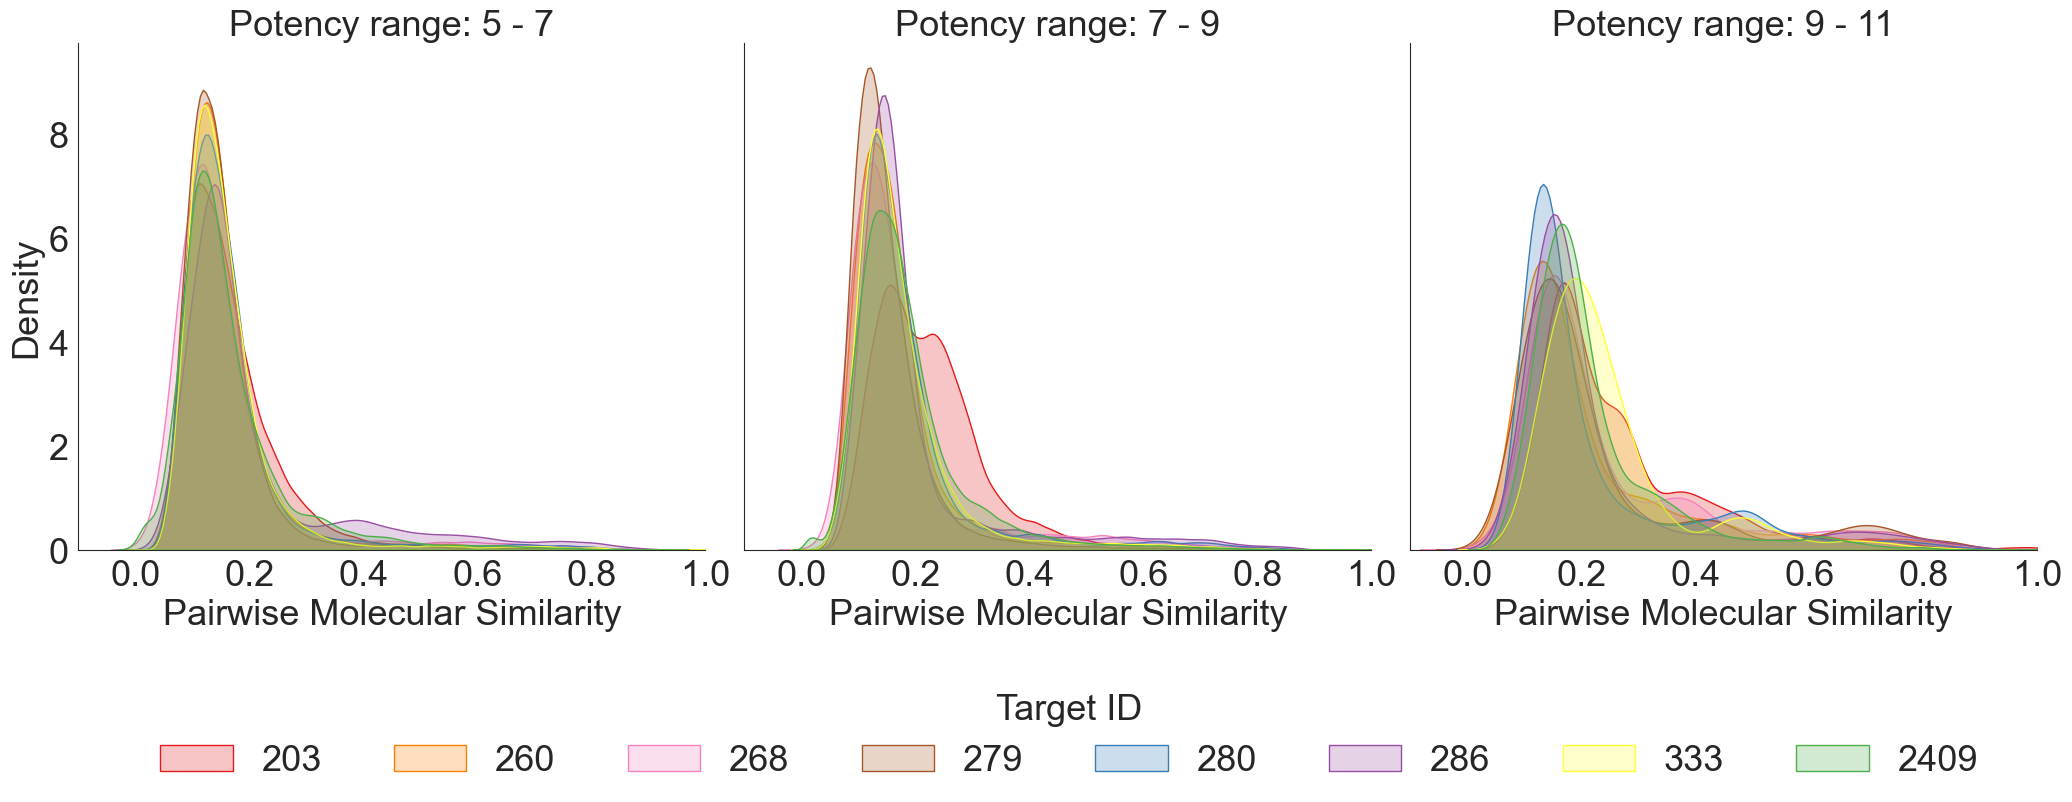

In [28]:

sns.set_style('white', {'axes.grid' : False})
font={'size': 26}
matplotlib.rc('font', **font)
f = sns.FacetGrid(df_sim_dataset, col='Potency range', hue='Target ID', height=7, col_wrap=3, palette=pal_mod).map(sns.kdeplot, 'Similarity', fill=True).add_legend()
f.set_titles("{col_var}: {col_name}")
f.set(xlim=(-0.1, 1), xticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
f.set_xlabels('Pairwise Molecular Similarity')
sns.move_legend(f, "lower center", ncol=8, bbox_to_anchor=(0.48, -0.2))
f.savefig(os.path.join(figure_path, 'S1c.png'), dpi=300, bbox_inches='tight')

### Figure S1d

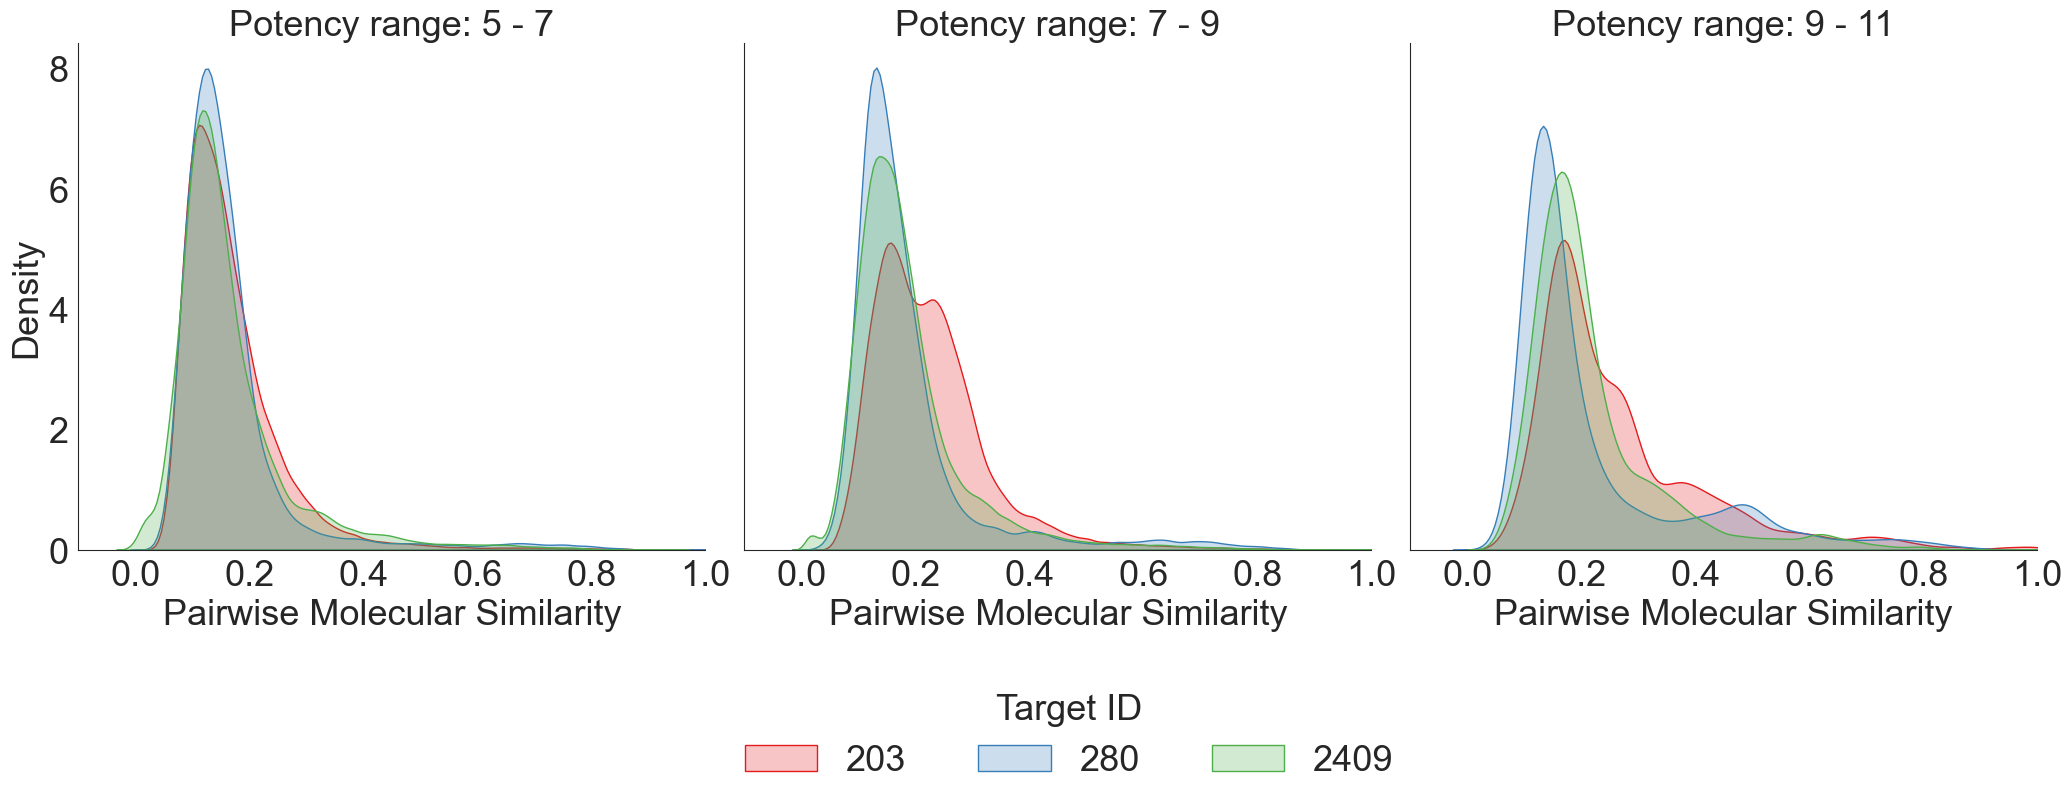

In [29]:
sns.set_style('white', {'axes.grid' : False})
font={'size': 26}
matplotlib.rc('font', **font)
f = sns.FacetGrid(df_sim_dataset.loc[df_sim_dataset['Target ID'].isin([203, 280, 2409])], col='Potency range', hue='Target ID', height=7, col_wrap=3, palette='Set1').map(sns.kdeplot, 'Similarity', fill=True).add_legend()
f.set_titles("{col_var}: {col_name}")
f.set(xlim=(-0.1, 1), xticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
f.set_xlabels('Pairwise Molecular Similarity')
sns.move_legend(f, "lower center", ncol=3, bbox_to_anchor=(0.48, -0.2))
f.savefig(os.path.join(figure_path, 'F2c.png'), dpi=300, bbox_inches='tight')